<a href="https://colab.research.google.com/github/phuocthok18/AI_HKI_2022_2023/blob/main/bt_cnn_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link dữ liệu **Hoa**: https://drive.google.com/drive/folders/1Y0DSrF8QBMKF6QMHap6aAiNwJ90hb6_3?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.utils import np_utils
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import os

hoa = ['hoacuc','hoamattroi','hoathuocduoc','hoavantho']
dir_train = '/content/drive/MyDrive/Hoa' 
distpath = []
x_train = []
y_train = []
# Tạo dữ liệu
def create_data(dir, x_train, y_train):
  for i in hoa:
    path = os.path.join(dir,i)
    index_label = hoa.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = load_img(img_path, target_size=(150,150)) 
      img = img_to_array(img)
      img = img.reshape(150,150,3) 
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
create_data(dir_train, x_train, y_train) #tạo dữ liệu 
# xử lí dữ liệu
x_train = np.array(x_train)
x_train = x_train.reshape(84,150,150,3)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)
print(x_train.shape) 
print(y_train.shape)

(84, 150, 150, 3)
(84, 4)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.3)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(58, 150, 150, 3)
(26, 150, 150, 3)
(58, 4)
(26, 4)


In [ ]:
from keras import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(150,150,3), padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 19, 19, 128)     

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 50, verbose=2)

Epoch 1/50
2/2 - 7s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 10.2324 - val_accuracy: 0.3846 - 7s/epoch - 3s/step
Epoch 2/50
2/2 - 4s - loss: 0.2931 - accuracy: 0.9655 - val_loss: 2.2296 - val_accuracy: 0.6923 - 4s/epoch - 2s/step
Epoch 3/50
2/2 - 4s - loss: 0.4361 - accuracy: 0.9138 - val_loss: 1.4126 - val_accuracy: 0.7308 - 4s/epoch - 2s/step
Epoch 4/50
2/2 - 4s - loss: 0.0124 - accuracy: 1.0000 - val_loss: 2.1655 - val_accuracy: 0.5769 - 4s/epoch - 2s/step
Epoch 5/50
2/2 - 4s - loss: 0.1148 - accuracy: 0.9483 - val_loss: 1.8357 - val_accuracy: 0.5000 - 4s/epoch - 2s/step
Epoch 6/50
2/2 - 4s - loss: 0.0754 - accuracy: 0.9655 - val_loss: 1.3336 - val_accuracy: 0.5769 - 4s/epoch - 2s/step
Epoch 7/50
2/2 - 4s - loss: 0.0494 - accuracy: 0.9828 - val_loss: 1.0909 - val_accuracy: 0.7308 - 4s/epoch - 2s/step
Epoch 8/50
2/2 - 4s - loss: 0.0284 - accuracy: 1.0000 - val_loss: 1.1652 - val_accuracy: 0.7692 - 4s/epoch - 2s/step
Epoch 9/50
2/2 - 4s - loss: 0.0140 - accuracy: 1.0000 - val_los

In [ ]:
metric = model.evaluate(X_test, Y_test, verbose=2)
print('sai so:', metric[0])
print('do chinh xac:', metric[1])

1/1 - 0s - loss: 4.7732 - accuracy: 0.6154 - 441ms/epoch - 441ms/step
sai so: 4.77323579788208
do chinh xac: 0.6153846383094788


Text(0.5, 0, 'So lan hoc')

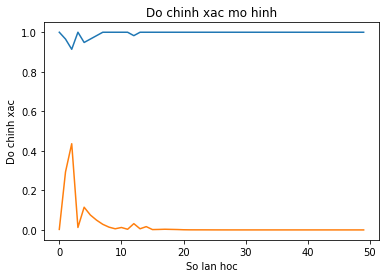

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Do chinh xac mo hinh')
plt.ylabel('Do chinh xac')
plt.xlabel('So lan hoc')

1/1 [==============================] - 0s 68ms/step
Ảnh là: Hoa Cúc


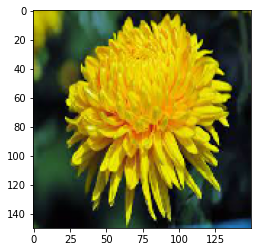

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pic = load_img('/content/cuc.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
classname=['Hoa Cúc','Hoa Hướng Dương','Hoa Thược Dược','Hoa Vạn Thọ']
a = int(np.argmax(model.predict(pic), axis=1))
print('Ảnh là:',classname[a])

1/1 [==============================] - 0s 98ms/step
Ảnh là: Hoa Vạn Thọ


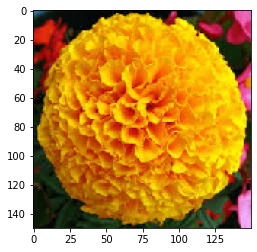

In [ ]:
pic = load_img('/content/tho.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
classname=['Hoa Cúc','Hoa Hướng Dương','Hoa Thược Dược','Hoa Vạn Thọ']
a = int(np.argmax(model.predict(pic), axis=1))
print('Ảnh là:',classname[a])

1/1 [==============================] - 0s 54ms/step
Ảnh là: Hoa Thược Dược


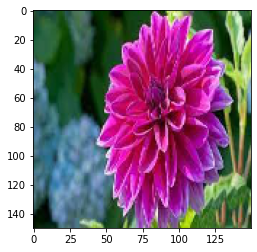

In [ ]:
pic = load_img('/content/thuocduoc.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
classname=['Hoa Cúc','Hoa Hướng Dương','Hoa Thược Dược','Hoa Vạn Thọ']
a = int(np.argmax(model.predict(pic), axis=1))
print('Ảnh là:',classname[a])

1/1 [==============================] - 0s 41ms/step
Ảnh là: Hoa Hướng Dương


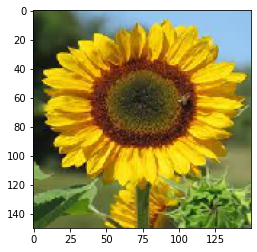

In [ ]:
pic = load_img('/content/hoamattroi.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
classname=['Hoa Cúc','Hoa Hướng Dương','Hoa Thược Dược','Hoa Vạn Thọ']
a = int(np.argmax(model.predict(pic), axis=1))
print('Ảnh là:',classname[a])